In [1]:
import dive
import matplotlib.pyplot as plt
import deerlab as dl
import numpy as np

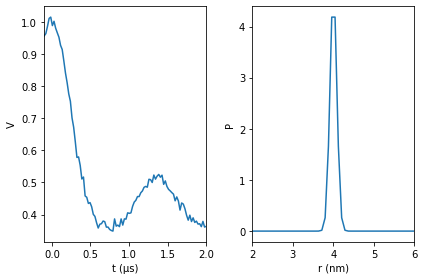

In [2]:
nr = 50
nt = 100

t = np.linspace(-0.1,2,nt)        # time axis, µs
r = np.linspace(2,6,nr)      # distance axis, ns
r0 = 4 
fwhm = 0.2 # parameters for three-Gaussian model
P0 = dive.dd_gauss(r,r0,fwhm)          # model distance distribution
lam = 0.5
k = 0.1
V0 = 1                      # modulation depth

B = dive.bg_exp(t,k)         # background decay
K = dl.dipolarkernel(t,r)    # kernel matrix
sigma = 0.01

Vexp = dive.deerTrace(K@P0,B,V0,lam) + dl.whitegaussnoise(t,sigma,seed=0)

fig, ax = plt.subplots(1,2)
line1 = ax[0].plot(t, Vexp)
line2 = ax[1].plot(r, P0)

ax[0].set(xlim = [min(t),max(t)], xlabel = 't (µs)', ylabel = 'V')
ax[1].set(xlim = [2,6], xlabel = 'r (nm)', ylabel = 'P')
plt.tight_layout()
plt.show()

## Draw a sample:

(50,)
12.446775607506483


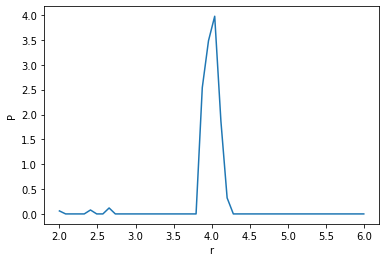

In [3]:
delta = 1

tau = 1/sigma**2

tauKtK = tau*np.matmul(np.transpose(K),K)

S = np.matmul(K,P0)
tauKtS = tau*np.matmul(np.transpose(K),S)
print(np.shape(tauKtS))

rn = np.linspace(1,nr,nr) 
L = dl.regoperator(rn,1)
LtL = np.matmul(np.transpose(L),L)

P = dive.randP(delta,tauKtK,tauKtS,LtL,nr)

print(sum(P))

plt.plot(r,P)
plt.xlabel('r')
plt.ylabel('P')
plt.show()

## Below are cells that were used during developing of the sampler

In [3]:
S = np.matmul(K,P0)
print(np.shape(S))

(100,)


In [4]:
delta = 0.01

tau = 1/sigma**2

tauKtK = tau*np.matmul(np.transpose(K),K)

S = np.matmul(K,P0)
tauKtS = tau*np.matmul(np.transpose(K),S)
print(np.shape(tauKtS))

rn = np.linspace(1,nr,nr) 
L = dl.regoperator(rn,1)
LtL = np.matmul(np.transpose(L),L)


(50,)


In [5]:
invSigma = tauKtK + delta*LtL
Sigma = np.linalg.inv(invSigma)
print(np.shape(invSigma))
print(np.shape(Sigma))

(50, 50)
(50, 50)


In [6]:
C_L = np.linalg.cholesky(Sigma)
print(np.shape(C_L))

(50, 50)


In [7]:
v = np.random.standard_normal(size=(nr,))
print(np.shape(v))

(50,)


In [8]:
w = np.linalg.lstsq(np.matrix.transpose(C_L),v,rcond=None)
print(np.shape(w[0]))

(50,)


(50,)
12.271946020819238


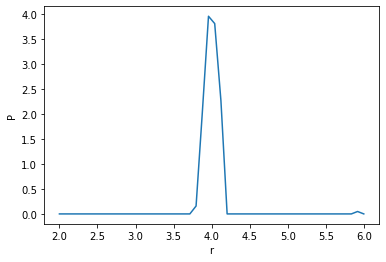

In [10]:
tauKtK

array([[  46.18448354,   81.97015992,   80.92938194, ...,   66.18874118,
          66.17291286,   33.07798279],
       [  81.97015992,  205.10158486,  184.0612717 , ...,  157.7874989 ,
         157.779589  ,   78.88801859],
       [  80.92938194,  184.0612717 ,  226.74898647, ...,  185.22611983,
         185.24934462,   92.64551094],
       ...,
       [  66.18874118,  157.7874989 ,  185.22611983, ..., 2178.1477218 ,
        2209.05116055, 1118.44970938],
       [  66.17291286,  157.779589  ,  185.24934462, ..., 2209.05116055,
        2244.31344264, 1138.26610659],
       [  33.07798279,   78.88801859,   92.64551094, ..., 1118.44970938,
        1138.26610659,  578.28861749]])

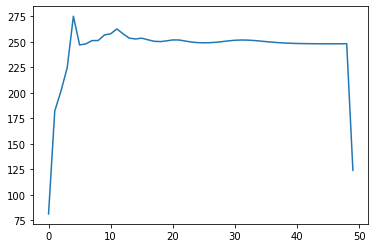

In [11]:
tauKtK[1,]

plt.plot(tauKtK[4,])